In [1]:
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nps
from scipy.stats import ks_2samp
from ndtest import ks2d2s
from matplotlib.ticker import FuncFormatter
import numpy as np

sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from plotting import *
from get_LrLx_data import *
from plotting import *

In [2]:
## Get the interpolated data
df = get_all_LrLx_data(interp=True, save=False, rerun=False)

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']


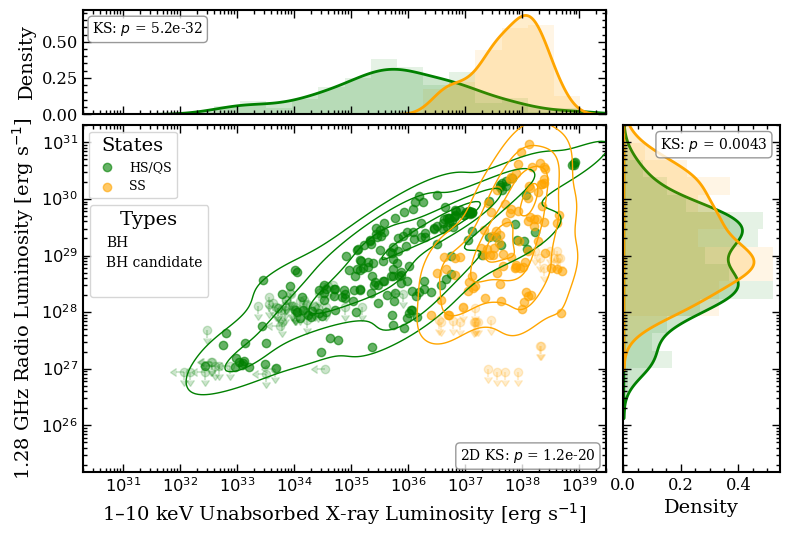

In [ ]:
mask_HS_radio_df_BH = df["state"].isin(["HS", "QS"]) & (df["class"].isin(["BH", "candidateBH"]))  & (df["Fx_uplim_bool"]==False) & (df["Fr_uplim_bool"]==False) 
mask_SS_radio_df_BH  = df["state"].isin(["SS"]) & (df["class"].isin(["BH", "candidateBH"]))  & (df["Fx_uplim_bool"]==False) & (df["Fr_uplim_bool"]==False) # , "IMS"


mask_HS_radio_df_BH_uplims = df["state"].isin(["HS", "QS"]) & (df["class"].isin(["BH", "candidateBH"]))  & ((df["Fx_uplim_bool"]==True) | (df["Fr_uplim_bool"]==True))
mask_SS_radio_df_BH_uplims  = df["state"].isin(["SS"]) & (df["class"].isin(["BH", "candidateBH"]))  & ((df["Fx_uplim_bool"]==True) | (df["Fr_uplim_bool"]==True)) #, "IMS"


x_HS = df["Lx"][mask_HS_radio_df_BH]
y_HS = df["Lr"][mask_HS_radio_df_BH]
x_SS = df["Lx"][mask_SS_radio_df_BH]
y_SS =  df["Lr"][mask_SS_radio_df_BH]



## Convert to log scale
log_x_HS = np.log10(x_HS).to_numpy()
log_y_HS = np.log10(y_HS).to_numpy()
log_x_SS = np.log10(x_SS).to_numpy()
log_y_SS =  np.log10(y_SS).to_numpy()

## KS Tests
pval_Lx = ks_2samp(log_x_HS, log_x_SS).pvalue
pval_Lr = ks_2samp(log_y_HS, log_y_SS).pvalue
pval_2D, D_2D = ks2d2s(log_x_HS, log_y_HS, log_x_SS, log_y_SS, extra=True)

## Define log bins
nbins = 20
log_bins_x = np.linspace(np.log10(min_Lx), np.log10(max_Lx), nbins + 1)
log_bins_y = np.linspace(np.log10(min_Lr), np.log10(max_Lr_2), nbins + 1)

## Setup figure and axes
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(2, 2, width_ratios=(5, 1.5), height_ratios=(1.5, 5), wspace=0.05, hspace=0.05)

ax_main = fig.add_subplot(gs[1, 0])
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_main)


colour1 = "green"
colour2= "orange"


## Main scatter + KDE
ax_main.scatter(log_x_HS, log_y_HS, color=colour1, alpha=0.6, label="HS/QS")
ax_main.scatter(log_x_SS, log_y_SS, color=colour2, alpha=0.6, label="SS")

levels = [0.05, 0.25, 0.6, 0.9]

sns.kdeplot(x=log_x_HS, y=log_y_HS, ax=ax_main, levels=levels, color=colour1, linewidths=1, fill=False)
sns.kdeplot(x=log_x_SS, y=log_y_SS, ax=ax_main, levels=levels, color=colour2, linewidths=1, fill=False)





## Upper limits
x_HS_uplims = df["Lx"][mask_HS_radio_df_BH_uplims]
y_HS_uplims = df["Lr"][mask_HS_radio_df_BH_uplims]
x_HS_uplim_mask = df["Fx_uplim_bool"][mask_HS_radio_df_BH_uplims]
y_HS_uplim_mask = df["Fr_uplim_bool"][mask_HS_radio_df_BH_uplims]
dx_HS_uplims = df["Lx_unc_l"][mask_HS_radio_df_BH_uplims]
dx_HS_uplims[~x_HS_uplim_mask] = 0 # don't plot x errorbars if not an upper limit
dy_HS_uplims = df["Lr_unc"][mask_HS_radio_df_BH_uplims]
dy_HS_uplims[~y_HS_uplim_mask] = 0 # don't plot y errorbars if not an upper limit
log_x_HS_uplims = np.log10(x_HS_uplims).to_numpy()
log_y_HS_uplims = np.log10(y_HS_uplims).to_numpy()
log_dx_HS_uplims = dx_HS_uplims / (x_HS_uplims * np.log(10))
log_dy_HS_uplims = dy_HS_uplims / (y_HS_uplims * np.log(10))


x_SS_uplims = df["Lx"][mask_SS_radio_df_BH_uplims]
y_SS_uplims = df["Lr"][mask_SS_radio_df_BH_uplims]
x_SS_uplim_mask = df["Fx_uplim_bool"][mask_SS_radio_df_BH_uplims]
y_SS_uplim_mask = df["Fr_uplim_bool"][mask_SS_radio_df_BH_uplims]
dx_SS_uplims = df["Lx_unc_l"][mask_SS_radio_df_BH_uplims]
dx_SS_uplims[~x_SS_uplim_mask] = 0 # don't plot x errorbars if not an upper limit
dy_SS_uplims = df["Lr_unc"][mask_SS_radio_df_BH_uplims]
dy_SS_uplims[~y_SS_uplim_mask] = 0 # don't plot y errorbars if not an upper limit
log_x_SS_uplims = np.log10(x_SS_uplims).to_numpy()
log_y_SS_uplims = np.log10(y_SS_uplims).to_numpy()  
log_dx_SS_uplims = dx_SS_uplims / (x_SS_uplims * np.log(10))
log_dy_SS_uplims = dy_SS_uplims / (y_SS_uplims * np.log(10))

ax_main.errorbar(log_x_HS_uplims, log_y_HS_uplims, xerr=log_dx_HS_uplims, yerr=log_dy_HS_uplims, uplims = y_HS_uplim_mask, xuplims=x_HS_uplim_mask, fmt='o', color=colour1, alpha=0.2) # , label="HS/QS upper limit"
ax_main.errorbar(log_x_SS_uplims, log_y_SS_uplims, xerr=log_dx_SS_uplims, yerr=log_dy_SS_uplims, uplims = y_SS_uplim_mask, xuplims=x_SS_uplim_mask, fmt='o', color=colour2, alpha=0.2) # , label="SS upper limit"




## Create state legend (within plot) in black
#states = ["HS","QS"]
#state_legend_handles = [plt.Line2D([0], [0], color='none', linestyle='None', markersize=1, marker=".", label=state) for state in states] 
#phantom = plt.Line2D([0], [0], color='none', label='\u200A' * 48)  
#state_legend_handles.append(phantom)
#state_legend = ax_main.legend(handles=state_legend_handles, loc="upper left",bbox_to_anchor=(0.0, 0.79), title="States", handlelength=0, fontsize=10)
#ax_main.add_artist(state_legend)  


# Create source type legend
types = ["BH", "candidateBH"]
types = ["BH candidate" if typ == "candidateBH" else typ for typ in types]
type_legend_handles = [plt.Line2D([0], [0], color='none', linestyle='None', markersize=1, marker=".",  label=typ) for typ in types]
phantom = plt.Line2D([0], [0], color='none', label='\u200A' * 65) 
type_legend_handles.append(phantom)
type_legend = ax_main.legend(handles=type_legend_handles,loc="upper left", bbox_to_anchor=(0.0, 0.79), title="Types", handlelength=0, fontsize=10) # bbox_to_anchor=(0.0, 0.68)
ax_main.add_artist(type_legend)


## Create types legend
#ax_main.legend( fontsize=9,loc="upper left", title="Types")
ax_main.legend( fontsize=9,loc="upper left", title="States")



## Add 2D KS p-value to legend
ax_main.text(0.98, 0.02, rf"2D KS: $p$ = {pval_2D:.2g}", transform=ax_main.transAxes, ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))


## Top histogram (Lx)
ax_top.hist(log_x_HS, bins=log_bins_x, density=True, alpha=0.1, color=colour1)
ax_top.hist(log_x_SS, bins=log_bins_x, density=True, alpha=0.1, color=colour2)
sns.kdeplot(log_x_HS, fill=True, alpha=0.2, linewidth=2, color=colour1, ax=ax_top)
sns.kdeplot(log_x_SS, fill=True, alpha=0.2, linewidth=2, color=colour2, ax=ax_top)
ax_top.set_ylabel("Density")
ax_top.text(0.23, 0.9, rf"KS: $p$ = {pval_Lx:.2g}", transform=ax_top.transAxes, ha='right', va='top', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.setp(ax_top.get_xticklabels(), visible=False)


## Right histogram (Lr)
ax_right.hist(log_y_HS, bins=log_bins_y, density=True, alpha=0.1, color=colour1, orientation='horizontal')
ax_right.hist(log_y_SS, bins=log_bins_y, density=True, alpha=0.1, color=colour2, orientation='horizontal')
sns.kdeplot(y=log_y_HS, fill=True, alpha=0.2, linewidth=2, color=colour1, ax=ax_right)
sns.kdeplot(y=log_y_SS, fill=True, alpha=0.2, linewidth=2, color=colour2, ax=ax_right)
ax_right.set_xlabel("Density")
ax_right.text(0.92, 0.97, rf"KS: $p$ = {pval_Lr:.2g}", transform=ax_right.transAxes, ha='right', va='top', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.setp(ax_right.get_yticklabels(), visible=False)


## Format the x-axis to mimic log scale
log_xmin = np.log10(min_Lx)
log_xmax = np.log10(max_Lx)
log_start_x = int(np.floor(log_xmin))
log_end_x = int(np.ceil(log_xmax))
major_ticks_x = np.arange(log_start_x, log_end_x)
minor_ticks_x = []
for decade in major_ticks_x:
    minor_ticks_x.extend([decade + np.log10(i) for i in range(2, 10)])
ax_main.set_xticks(major_ticks_x)
ax_main.set_xticks(minor_ticks_x, minor=True)
ax_main.xaxis.set_major_formatter(FuncFormatter(lambda val, _: f"$10^{{{int(val)}}}$"))
ax_main.xaxis.set_minor_formatter(FuncFormatter(lambda val, _: ""))


## Format y-axis
log_ymin = np.log10(min_Lr)
log_ymax = np.log10(max_Lr_2)
log_start_y = int(np.floor(log_ymin))
log_end_y = int(np.ceil(log_ymax))
major_ticks_y = np.arange(log_start_y, log_end_y)
minor_ticks_y = []
for decade in major_ticks_y:
    minor_ticks_y.extend([decade + np.log10(i) for i in range(2, 10)])
ax_main.set_yticks(major_ticks_y)
ax_main.set_yticks(minor_ticks_y, minor=True)
ax_main.yaxis.set_major_formatter(FuncFormatter(lambda val, _: f"$10^{{{int(val)}}}$"))
ax_main.yaxis.set_minor_formatter(FuncFormatter(lambda val, _: ""))


## Set axis limits and labels
ax_main.set_xlim([np.log10(min_Lx), np.log10(max_Lx)])
ax_main.set_ylim([np.log10(min_Lr), np.log10(max_Lr_2)])
#ax_main.set_xlabel(r'$L_X$ [erg s$^{-1}$]')
#ax_main.set_ylabel(r'$L_R$ [erg s$^{-1}$]')
ax_main.set_xlabel(r'1–10 keV Unabsorbed X-ray Luminosity [erg s$^{-1}$]')
ax_main.set_ylabel(r'1.28 GHz Radio Luminosity [erg s$^{-1}$]')

save_name = "HS_SS_distributions_interp"
plt.savefig(f"../FIGURES/{save_name}.png", dpi=600,bbox_inches="tight")
plt.savefig(f"../FIGURES/{save_name}.pdf", dpi=600,bbox_inches="tight")

plt.show()

